<a href="https://colab.research.google.com/github/Seong-JiHyeon/NLTK/blob/master/Genomics_%26_Informatics_%EB%85%BC%EB%AC%B8%EC%A7%80%EC%9D%98_%ED%8A%B9%EC%A0%95_%EB%8B%A8%EC%96%B4_%EB%85%BC%EB%AC%B8%EB%B3%84_%EC%97%B0%EB%8F%84%EB%B3%84_%EB%B6%84%ED%8F%AC_%EA%B5%AC%ED%95%98%EA%B8%B0_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My Drive/인공지능 수업 데이터 파일

/content/gdrive/My Drive/인공지능 수업 데이터 파일


In [0]:
# github에서 논문 다운로드 후, corpus로 받아오기
import nltk
from nltk.corpus import *
corpus_root = '/content/gdrive/My Drive/인공지능 수업 데이터 파일/Genomics-Informatics-Corpus-master/GNI Corpus 1.0/raw/'

giCorpus = {}
filelists = PlaintextCorpusReader(corpus_root, '.*\.txt', encoding='utf-8')
print(len(filelists.fileids()), filelists.fileids()) #폴더에 저장되어 있는 파일 개수 및 파일 이름

351 ['gi-2017-15-3-81.txt', 'gi-2017-15-3-82.txt', 'gi-2017-15-4-113.txt', 'gi-2017-15-4-114.txt', 'gi-2017-15-4-123.txt', 'gi-2017-15-4-128.txt', 'gi-2017-15-4-136.txt', 'gi-2017-15-4-142.txt', 'gi-2017-15-4-147.txt', 'gi-2017-15-4-156.txt', 'gi-2017-15-4-162.txt', 'gi-2017-15-4-170.txt', 'gi-2017-15-4-178.txt', 'gi-2018-16-1-1.txt', 'gi-2018-16-1-10.txt', 'gi-2018-16-1-14.txt', 'gi-2018-16-1-2.txt', 'gni-10-1.txt', 'gni-10-106.txt', 'gni-10-110.txt', 'gni-10-117.txt', 'gni-10-123.txt', 'gni-10-128.txt', 'gni-10-133.txt', 'gni-10-145.txt', 'gni-10-153.txt', 'gni-10-16.txt', 'gni-10-167.txt', 'gni-10-175.txt', 'gni-10-184.txt', 'gni-10-194.txt', 'gni-10-200.txt', 'gni-10-206.txt', 'gni-10-213.txt', 'gni-10-214.txt', 'gni-10-220.txt', 'gni-10-226.txt', 'gni-10-23.txt', 'gni-10-234.txt', 'gni-10-239.txt', 'gni-10-244.txt', 'gni-10-249.txt', 'gni-10-256.txt', 'gni-10-263.txt', 'gni-10-266.txt', 'gni-10-271.txt', 'gni-10-33.txt', 'gni-10-40.txt', 'gni-10-44.txt', 'gni-10-51.txt', 'gni-10-5

In [0]:
for file in filelists.fileids():
  wordlist = filelists.words(file)
  print("Printing size of " + file + " original wordlist: " +  str(len(wordlist))) #각 파일당 몇 개의 단어를 가지고 있는지 알아보기

Printing size of gi-2017-15-3-81.txt original wordlist: 367
Printing size of gi-2017-15-3-82.txt original wordlist: 1949
Printing size of gi-2017-15-4-113.txt original wordlist: 395
Printing size of gi-2017-15-4-114.txt original wordlist: 3638
Printing size of gi-2017-15-4-123.txt original wordlist: 2054
Printing size of gi-2017-15-4-128.txt original wordlist: 2618
Printing size of gi-2017-15-4-136.txt original wordlist: 2644
Printing size of gi-2017-15-4-142.txt original wordlist: 1804
Printing size of gi-2017-15-4-147.txt original wordlist: 3374
Printing size of gi-2017-15-4-156.txt original wordlist: 1972
Printing size of gi-2017-15-4-162.txt original wordlist: 3338
Printing size of gi-2017-15-4-170.txt original wordlist: 3129
Printing size of gi-2017-15-4-178.txt original wordlist: 2084
Printing size of gi-2018-16-1-1.txt original wordlist: 415
Printing size of gi-2018-16-1-10.txt original wordlist: 2454
Printing size of gi-2018-16-1-14.txt original wordlist: 2858
Printing size of 

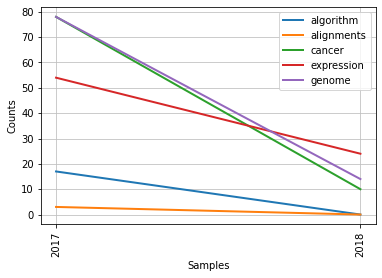

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1[3:7])
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1.startswith('gi') and w.lower().startswith(target))

cfd.plot() #gi로 시작하는 논문인 2017, 2018년도의 논문을 연도별로 분석: 2017 연도의 논문들이 예시 단어들을 더 많이 사용했음을 알 수 있음

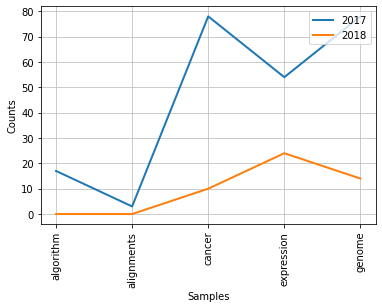

In [0]:
cfd = nltk.ConditionalFreqDist(
    (fileid1[3:7], target)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1.startswith('gi') and w.lower().startswith(target))

cfd.plot() #각 단어에 대한 2017, 2018년도 논문의 단어 사용 빈도수를 나타낸 그래프

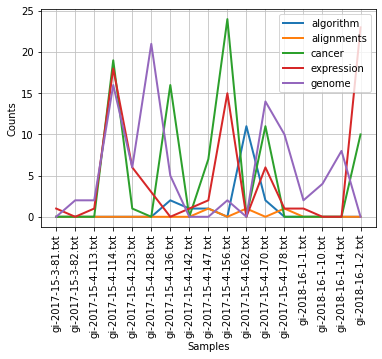

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1.startswith('gi') and w.lower().startswith(target))

cfd.plot() #gi로 시작하는 논문 각각의 단어 표현 살펴보기

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if (fileid1[3:7] == '2017') and w.lower().startswith(target))

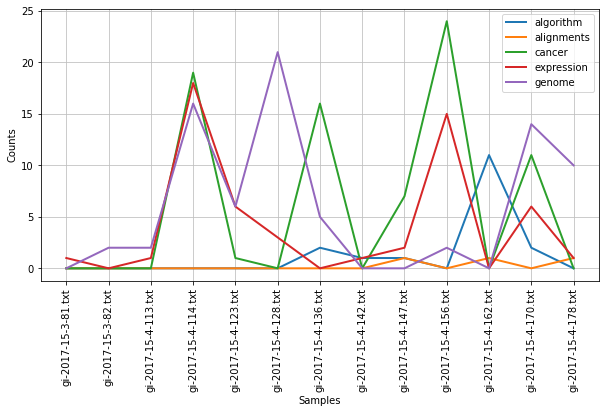

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
cfd.plot() #2017년도 논문만 추출

In [0]:
cfd = nltk.ConditionalFreqDist(
    (fileid1, target)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if (fileid1[3:7] == '2017') and w.lower().startswith(target))

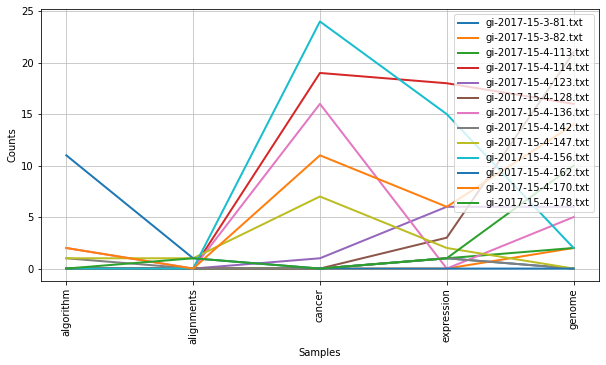

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
cfd.plot() # 각 단어에 대한 2017 논문별 빈도수를 나타낸 그래프

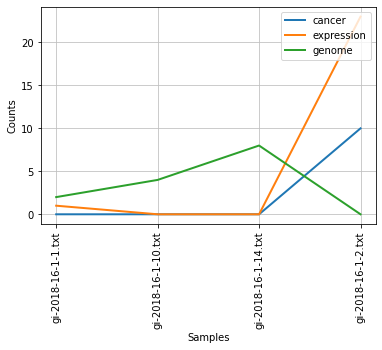

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if (fileid1[3:7] == '2018') and w.lower().startswith(target))

cfd.plot() #2018년도 논문만 추출하여 그린 그래프

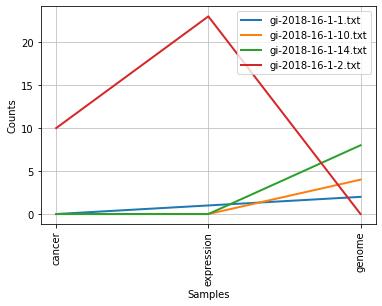

In [0]:
cfd = nltk.ConditionalFreqDist(
    (fileid1, target)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if (fileid1[3:7] == '2018') and w.lower().startswith(target))

cfd.plot() #2018논문만 추출하여 각 단어에 대한 빈도수를 나타낸 그래프

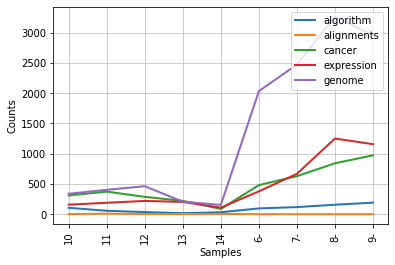

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1[4:6])
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1.startswith('gni') and w.lower().startswith(target))

cfd.plot() #gni로 시작하는 논문 볼룸별 단어 빈도수 그래프

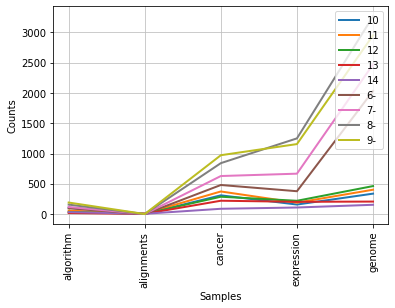

In [0]:
cfd = nltk.ConditionalFreqDist(
    (fileid1[4:6], target)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1.startswith('gni') and w.lower().startswith(target))

cfd.plot() #단어 별 논문 volume의 사용 빈도수

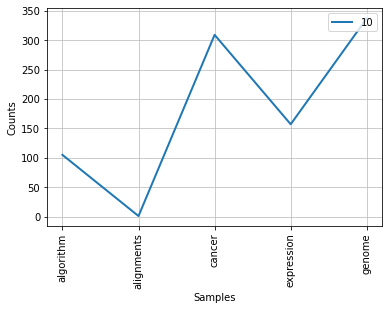

In [0]:
cfd = nltk.ConditionalFreqDist(
    (fileid1[4:6], target)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if fileid1[4:6]=='10' and w.lower().startswith(target))

cfd.plot() #gi 논문 중 volume10 논문을 추출하여 단어별 빈도수를 살펴본 결과

In [0]:
cfd = nltk.ConditionalFreqDist(
    (target,fileid1)
    for fileid1 in filelists.fileids()
    for w in filelists.words(fileid1)
    for target in ['algorithm', 'alignments', 'cancer', 'expression', 'genome'] 
    if w.lower().startswith(target))

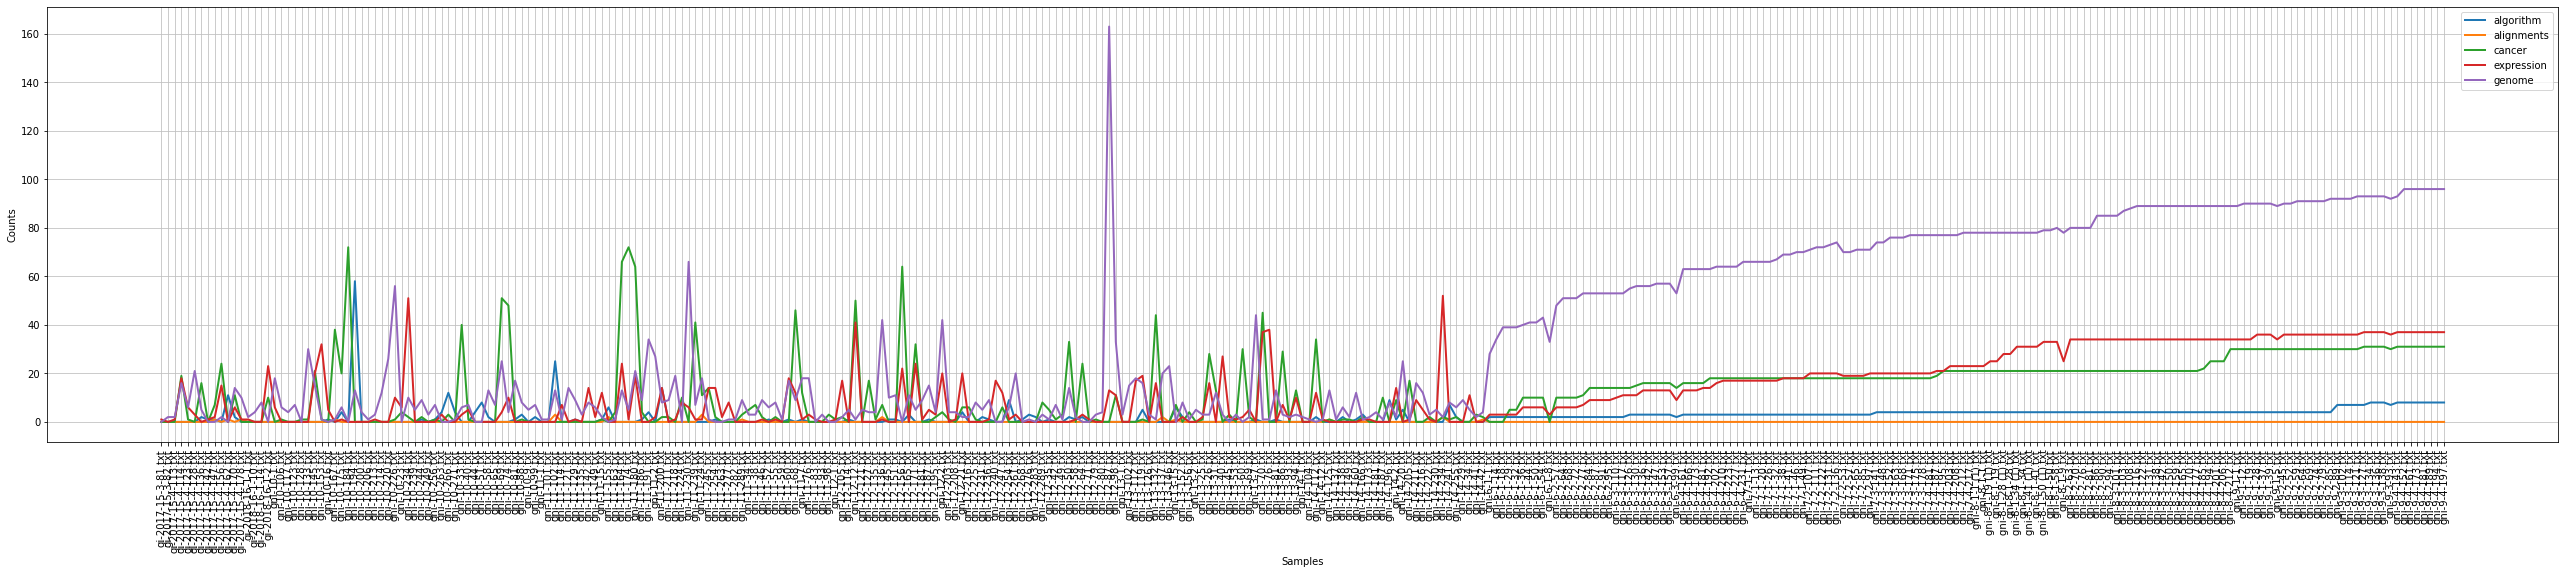

In [0]:
plt.figure(figsize=(45, 8))
cfd.plot() #gni, gi 논문, 즉 폴더에 있는 모든 논문들의 단어 사용 빈도수를 그래프로 나타낸 결과



---

